<a href="https://colab.research.google.com/github/himanshu302002/ML-Regression-/blob/main/(Capstone_Project)ML_Regression_on_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GitHub Link -**

https://github.com/himanshu302002/ML-Regression-.git

# **Project Name**    - 



##### **Project Type**    - ML Regression on Retail Sales Prediction
##### **Contribution**    - Individual(Himanshu Goel)


# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


DATA DESCRIPTION

### <b>Rossmann Stores Data.csv </b> - historical data including Sales

### <b>store.csv </b> - supplemental information about the stores
### Almost all of the fields are self-explanatory. The following is the  descriptions for those that aren't.


* #### Id - an Id that represents a (Store, Date) duple within the test set

* #### Store - a unique Id for each store

* #### Sales - the turnover for any given day (this is what you are predicting)

* #### Customers - the number of customers on a given day

* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open

* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

* #### StoreType - differentiates between 4 different store models: a, b, c, d

* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended

* #### CompetitionDistance - distance in meters to the nearest competitor store

* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

* #### Promo - indicates whether a store is running a promo on that day

* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




Importing Necessary Pyhton Libraries

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6


import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet




**Loading DATA**

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Dataset**

In [4]:
#Loading Rossman Dataset
rossman_df = pd.read_csv('Rossmann Stores Data.csv' )

In [5]:
# Loading Store Dataset
store_df = pd.read_csv('store.csv')

**Let us Start by Analysing The Rossmann Dataset**

In [12]:
rossman_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0


In [13]:
rossman_df.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0
55812,63,4,2015-06-11,5438,525,1,0,NaN,NaN


**Necessary Information Analysis About Dataset**

In [14]:
rossman_df.shape


(55813, 9)

Our dataset have 9 columns and more than a million rows

In [15]:
#Checking info of data 
rossman_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55813 entries, 0 to 55812
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          55813 non-null  int64  
 1   DayOfWeek      55813 non-null  int64  
 2   Date           55813 non-null  object 
 3   Sales          55813 non-null  int64  
 4   Customers      55813 non-null  int64  
 5   Open           55813 non-null  int64  
 6   Promo          55813 non-null  int64  
 7   StateHoliday   55812 non-null  float64
 8   SchoolHoliday  55812 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 3.8+ MB


 7 columns have integer and 2 columns have string as data type in our dataset

In [16]:
#Checking Null Values
rossman_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     1
SchoolHoliday    1
dtype: int64

There are no null values in our dataset

**Dataset Summary in Statistical Form**

In [17]:
rossman_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55812.0,55812.000000
mean,557.406267,4.019977,6115.434648,638.912458,0.863150,0.399548,0.0,0.239178
std,322.178896,1.983740,3754.196751,440.827304,0.343692,0.489810,0.0,0.426585
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,278.000000,2.000000,4178.000000,436.000000,1.000000,0.000000,0.0,0.000000
50%,557.000000,4.000000,6020.000000,609.000000,1.000000,0.000000,0.0,0.000000
75%,836.000000,6.000000,8106.000000,816.000000,1.000000,1.000000,0.0,0.000000
max,1115.000000,7.000000,41551.000000,4783.000000,1.000000,1.000000,0.0,1.000000


In [18]:
# Finding No. Of Stores in the Dataset
rossman_df.Store.nunique()


1115

In [19]:
# Finding Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()


0.0    55812
Name: StateHoliday, dtype: int64

**Figuring out timeframe of our dataset**

In [20]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')


2015-06-11 initial
2015-07-31 final


**From 2013 to 2015 so we have a dataset of around 3 years.**

**Converting our Datatype**

In [21]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)


In [22]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,2015,7,31,31


**Doing EDA On our Rossmann Dataset**

**Let us Create a Heatmap**

<ipython-input-23-8728f8903ebb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = rossman_df[rossman_df.columns].corr()


<Axes: >

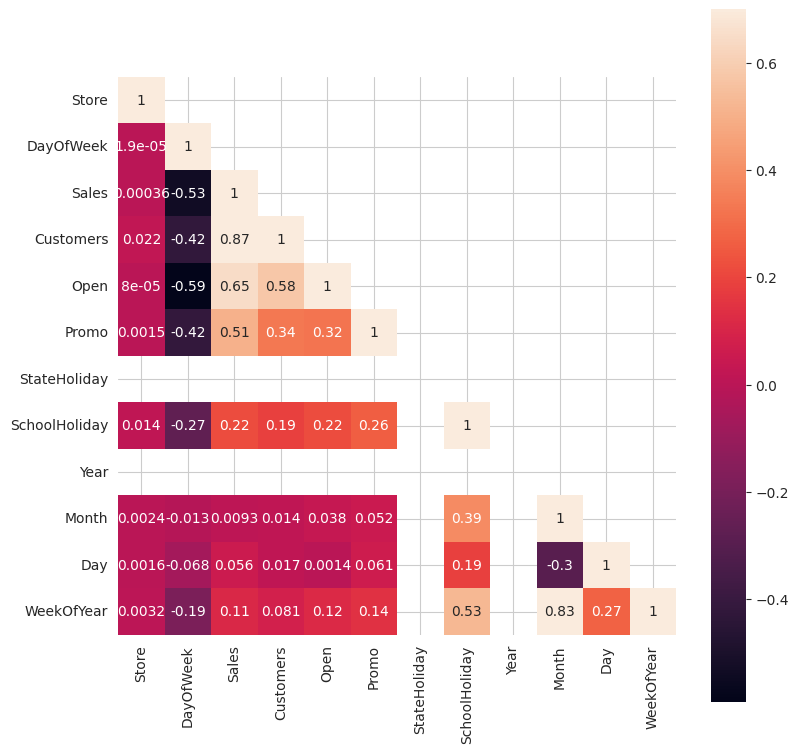

In [23]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)


**Let us Figure out Closing Dates of Our Store**

<Axes: xlabel='DayOfWeek', ylabel='count'>

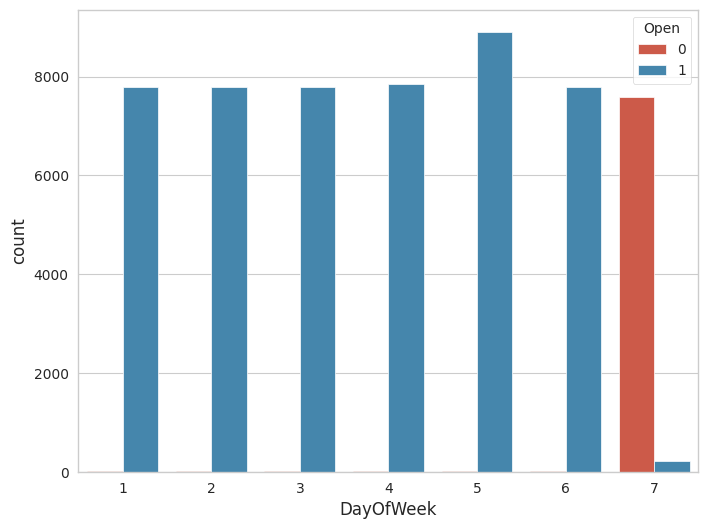

In [24]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)


Our Store Mostly Remains Closed At Sunday 

**Impact of Promo on Sales**

<Axes: xlabel='Promo', ylabel='Sales'>

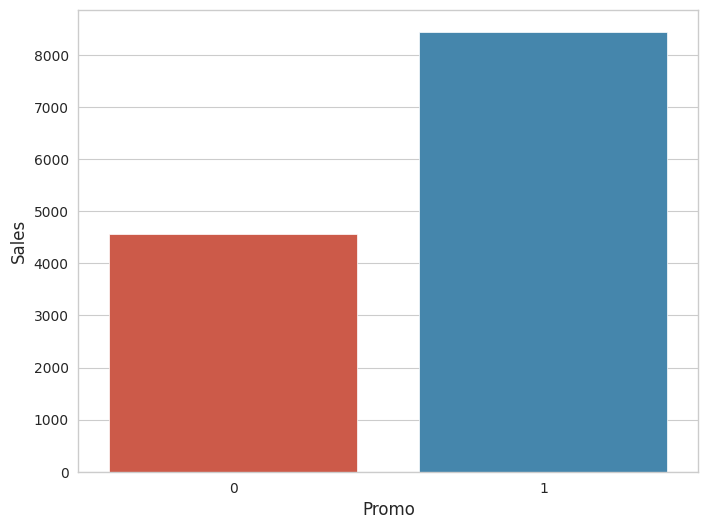

In [25]:
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])


When Promo is Running Sales are almost Double

**Monthly Sales Prediction**

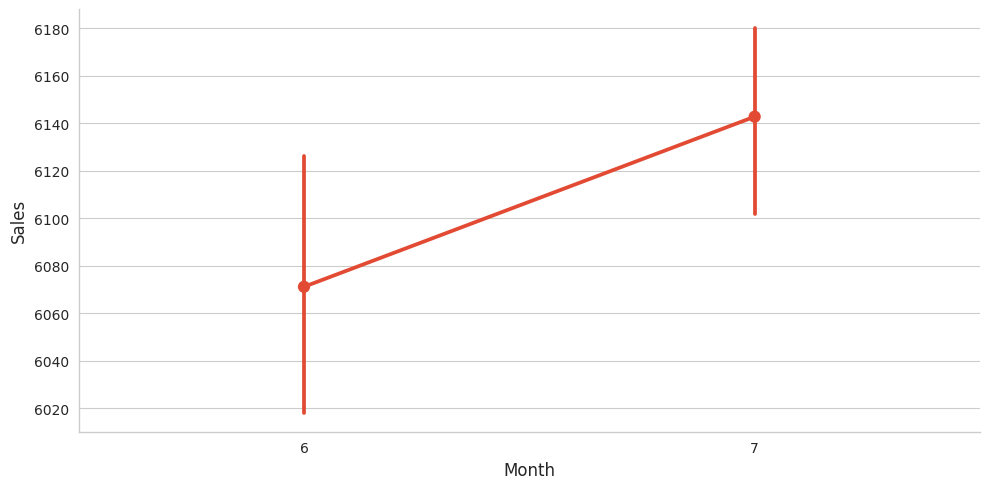

In [26]:

sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2)


After July sales starts to drop and Increase at November and reaches its Peak at around Christmas eve.

**Value Counts of School Holiday**

In [27]:
rossman_df.SchoolHoliday.value_counts()


0.0    42463
1.0    13349
Name: SchoolHoliday, dtype: int64

**Sales Affected by School Holiday**

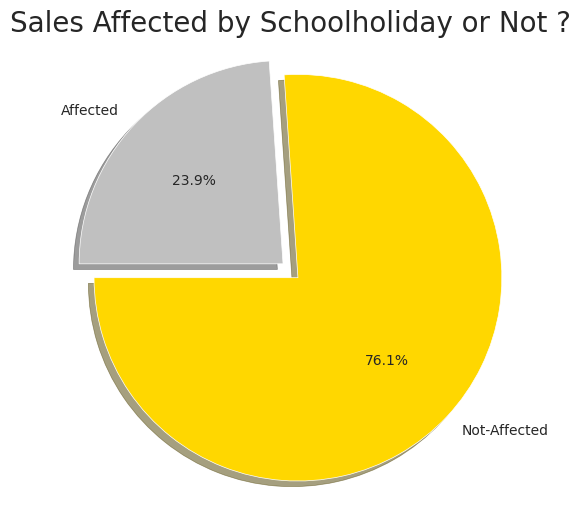

In [28]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


Sales affected by school holiday is less than 25 percent so we can say that school holiday does not necessarily reduce sales percentage

**Sales Distribution**

<ipython-input-34-9e973c764c7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_df['Sales'], kde = False,bins=40);


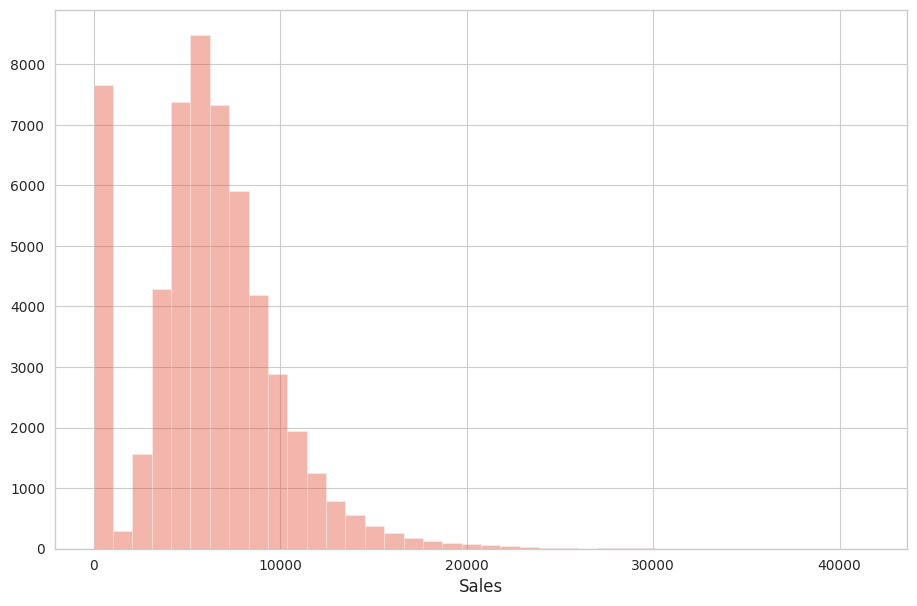

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);


**Due to the reason of store being closed most of the time 0 is being showed**

**Customers vs Sales**

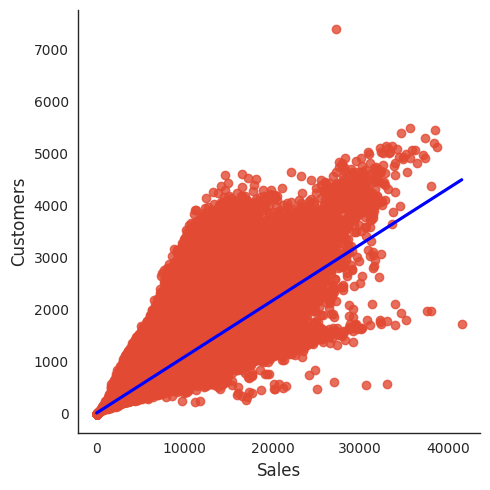

In [ ]:

sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});


**The Relationship between Sales and Customer is Linear**

**Moving on to Analyze The Store Dataset**

In [35]:
store_df.head(5)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [36]:
store_df.tail()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [37]:
store_df.shape


(1115, 10)

**Our Dataset have 10 Columns and around 1000 Rows**

**Analyzing our Dataset**

In [38]:
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


** Our Datatype  is float , integer , string as well**

**Checking Null Values**

In [39]:
store_df.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**This Time we do have Null Values That too in more than half our Columns**

**Let us Create a Heatmap For our Null Values**

<Axes: >

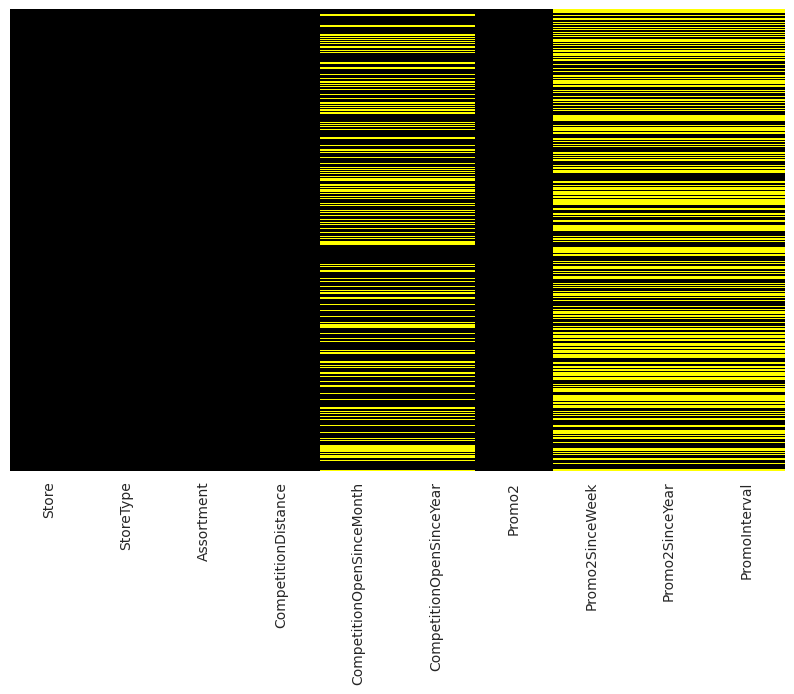

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')


**Let us Check The Distribution of Different Store Types**

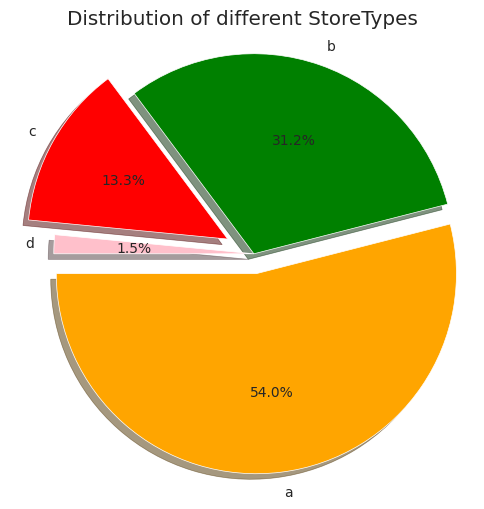

In [41]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


More than 50 percent of stores are of 'a' type and 'd' type have the least stores with less than 2 percent

**Removing Features With High Percentages of Missing Values**

Removing features with more than 30 percent missing values , to avoid inaccuracy .

In [42]:
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)


**Dropped 5 unnecessary Features to Increase Accuracy**

**Now , Let Us Replace The Missing Values of Features With Low Percentage of Missing Values**

<ipython-input-43-ba1d1c1ea979>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

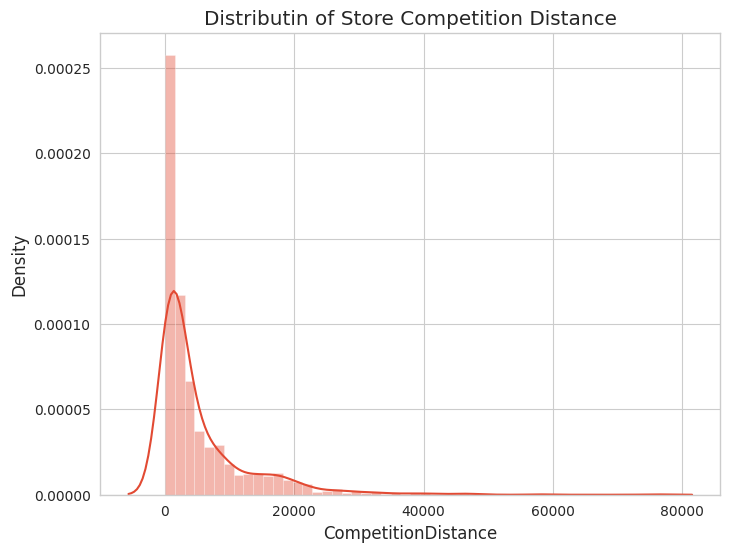

In [43]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")


**Clearly The Distribution Is Right Skewed, That Is Why We Will Have To Replace The Missing Values With The Median**

In [44]:
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)


**Creating a Pair Plot For Our Store Dataset**

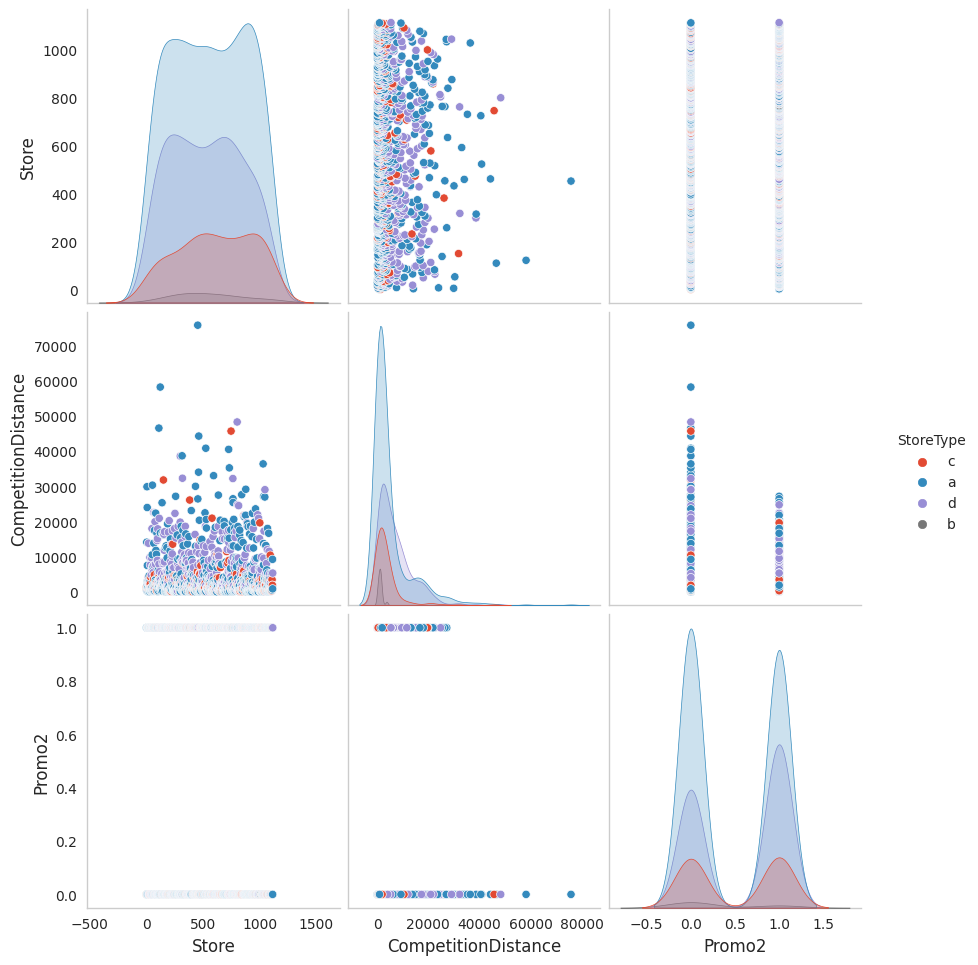

In [45]:
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);


**Now , Let us check Stores With Their Assortment Type**

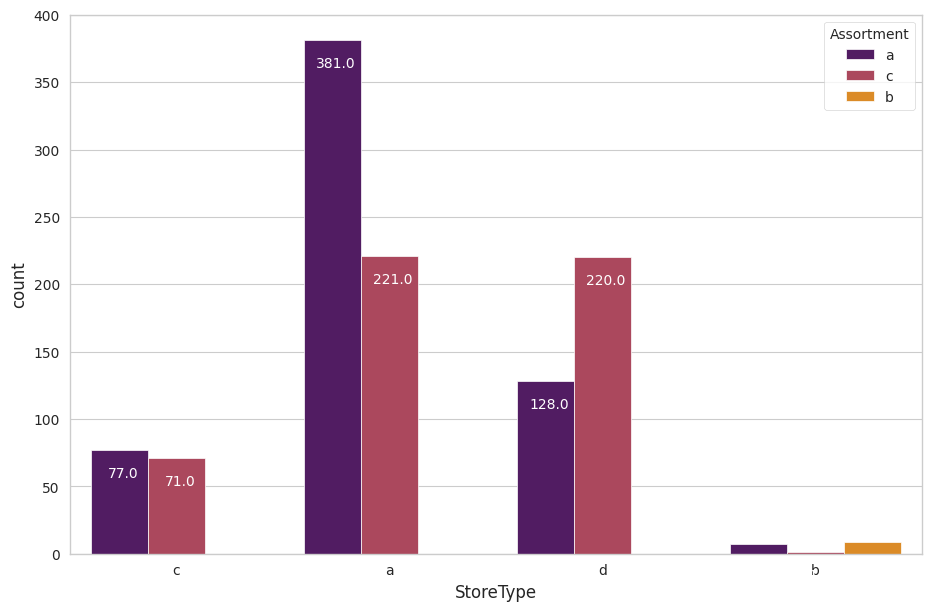

In [55]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")
for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)


**Let us Merge Our Two Datasets**

In [58]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1.0,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1.0,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1.0,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1.0,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1.0,2015,7,31,31,a,a,29910.0,0


In [59]:
df.shape


(55813, 16)

**Our Merged Dataset Have 16 Columns**

**Creating a Heatmap of Our Merged Dataset**

<ipython-input-60-4f2e82027cdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

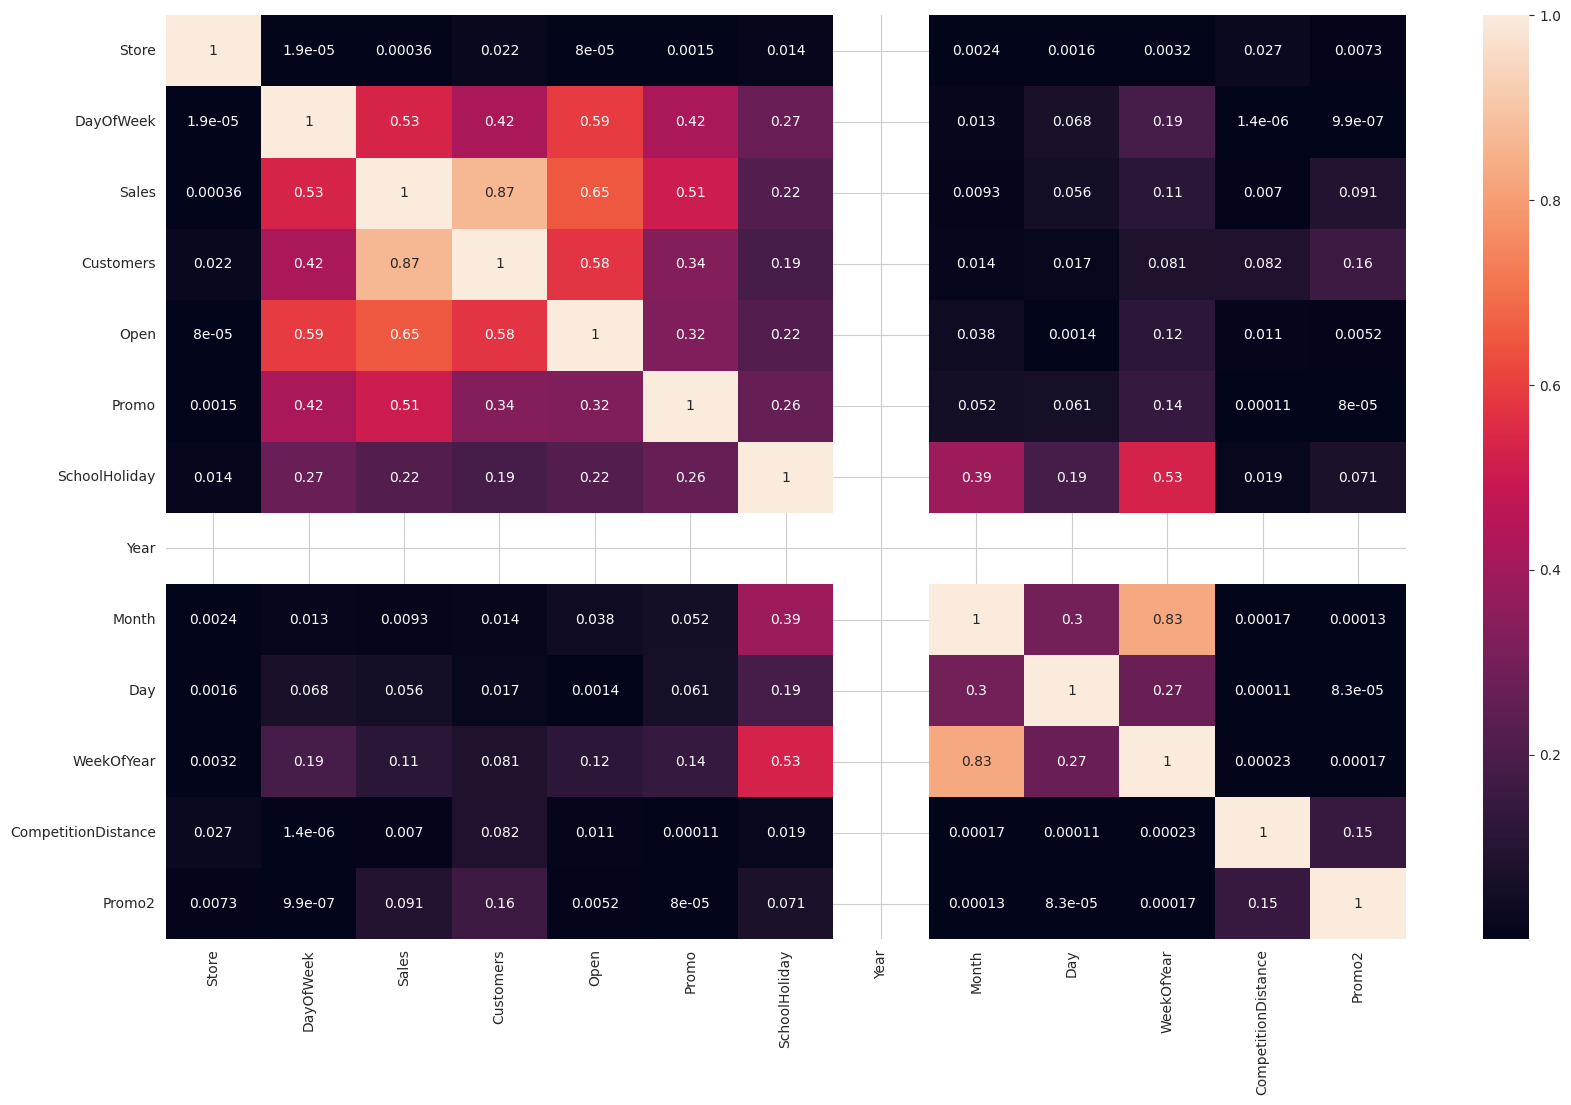

In [60]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.savefig("heatmap.png")
from google.colab import files
files.download('heatmap.png') # this line opens your documents in your pc to save your png


In [61]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers


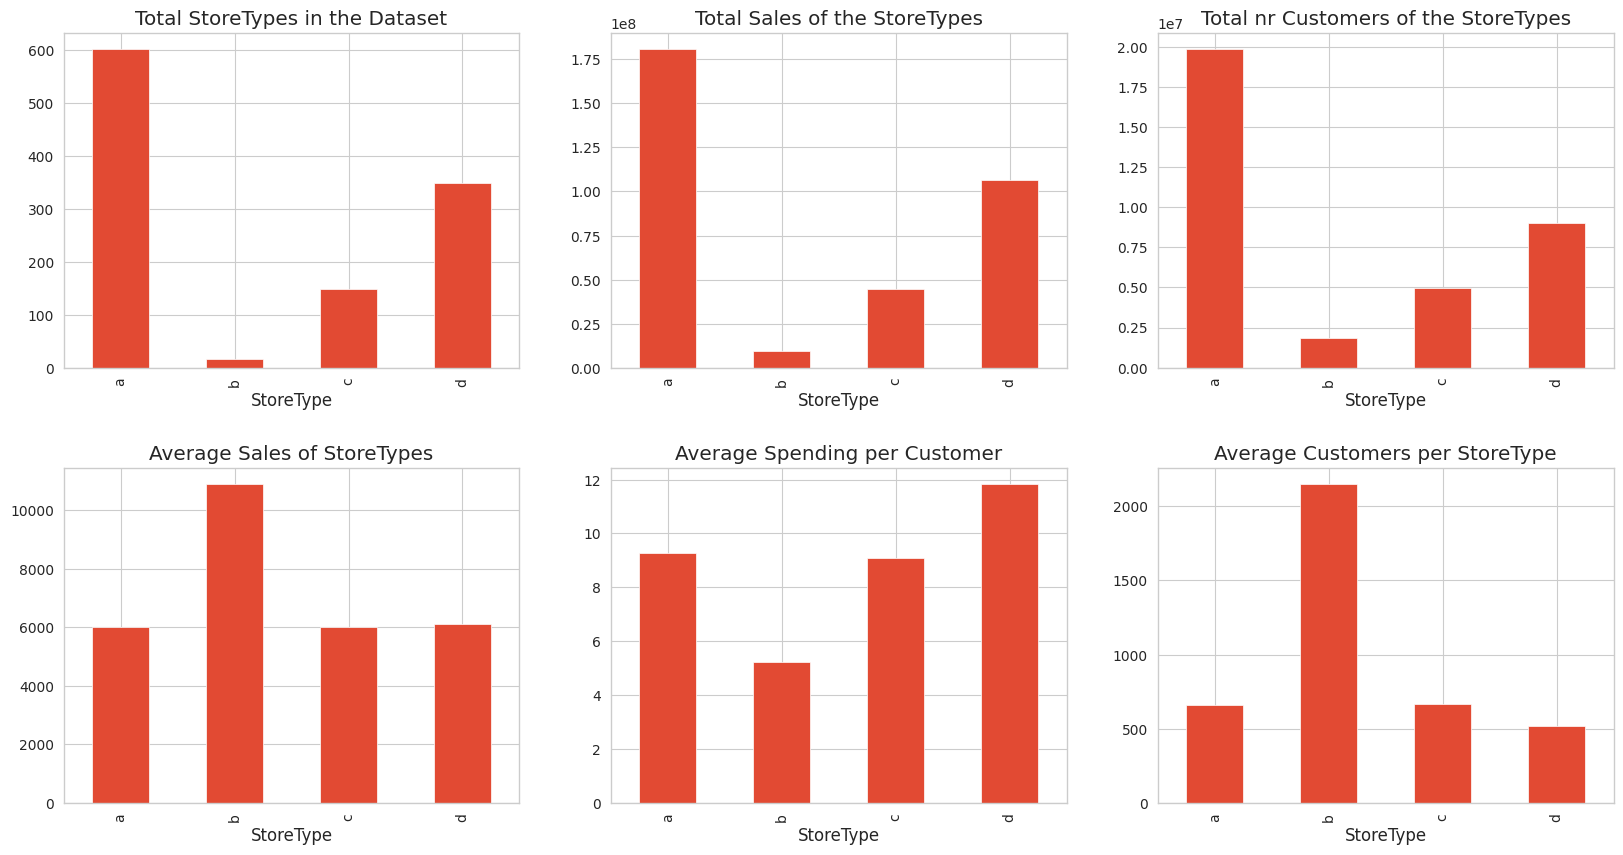

In [62]:
f, ax = plt.subplots(2, 3, figsize = (20,10))
store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")
plt.subplots_adjust(hspace = 0.3)
plt.show()


Some Noticable Points From our Graphs :
1. The Store Type 'a' has the most sales stores and customers
2. Store Type D Has The Best Average Spendings Per Customers
3. Store Type 'b' has only 17 stores , but most average customers.

**Now , Let us Check Promotions**

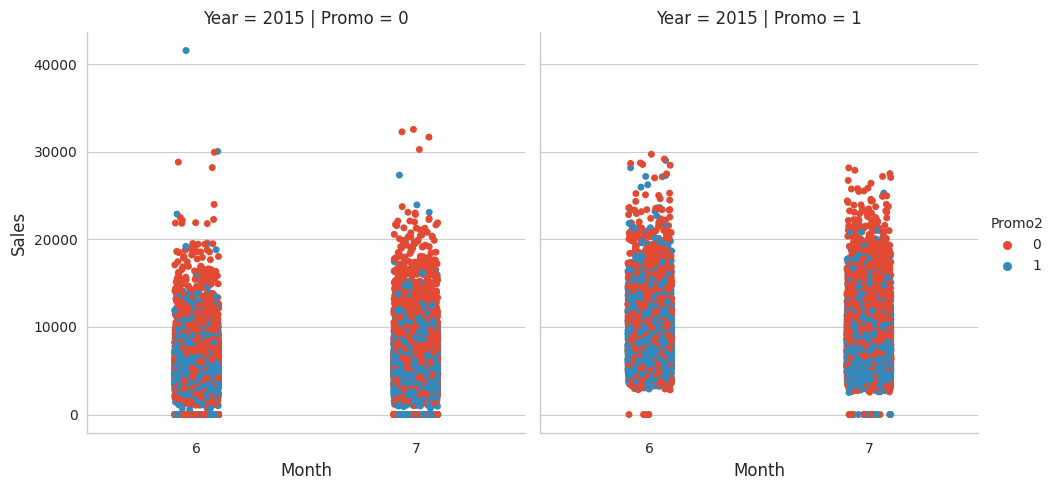

In [63]:
sns.catplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 
            


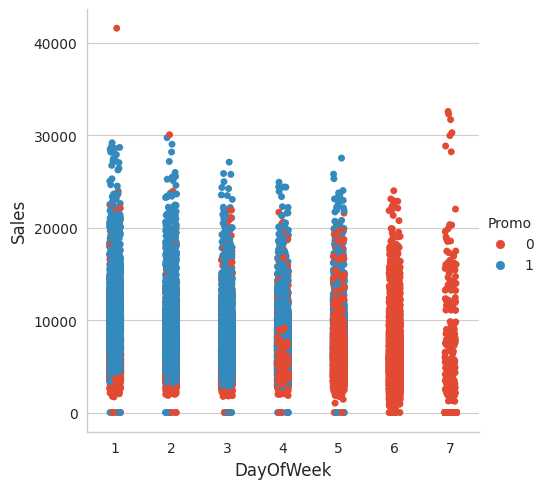

In [64]:
sns.catplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")



**Clearly when The Promo Runs , Sales gets Higher**

From the Graph , we can see no promotions are being done in the weekend.
The Sales are Very High , If the Stores Have Promotion.
Sales are Highest on Sunday

**Trends on Yearly Basis**

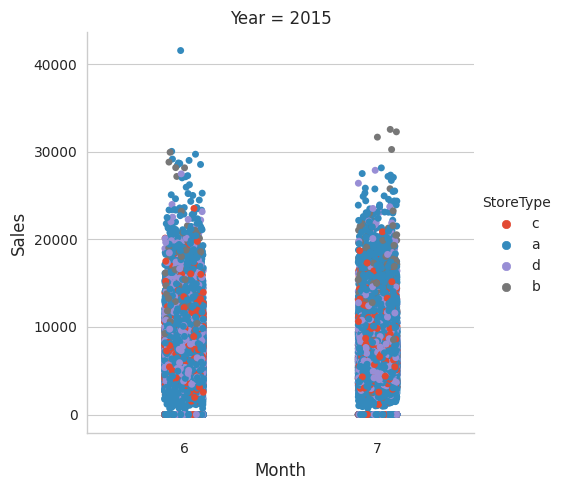

In [65]:
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")


**There is no Clear Trend, Which means Sales Remain Constant Yearly**

**Impact of Competition Distance on Sales**

In [66]:
df.CompetitionDistance.describe()


count    55813.000000
mean      5395.579166
std       7650.035722
min         20.000000
25%        720.000000
50%       2325.000000
75%       6880.000000
max      75860.000000
Name: CompetitionDistance, dtype: float64

Creating a New Variable By Converting our Continous Numbers into a Categories.

In [67]:
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

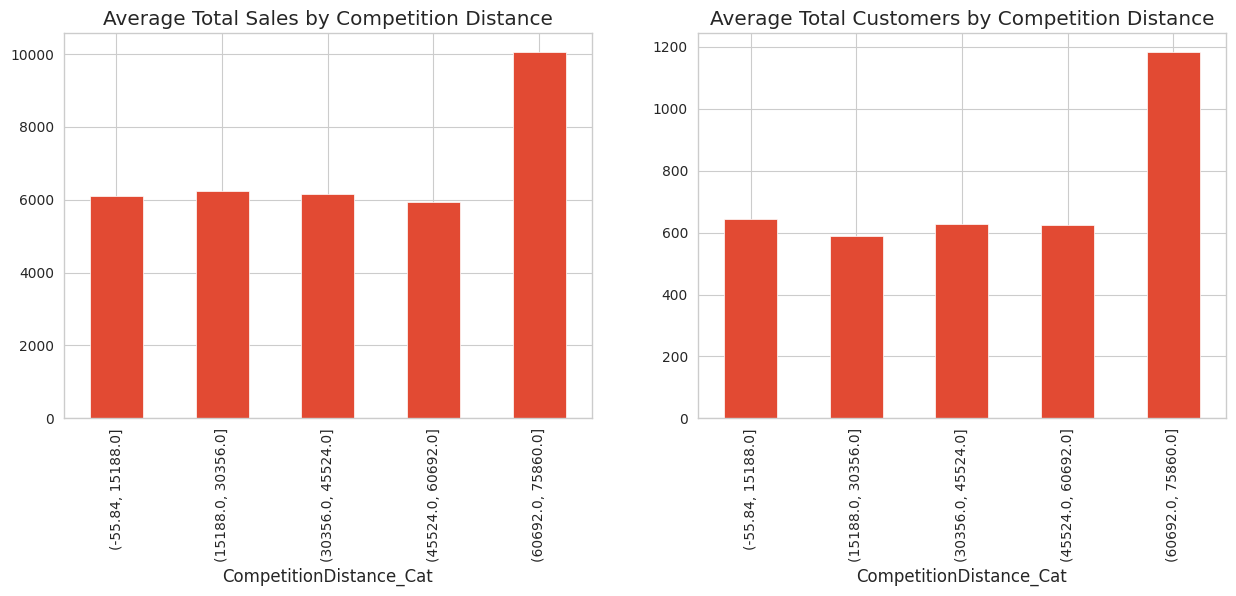

In [68]:
f, ax = plt.subplots(1,2, figsize = (15,5))
df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


**If the competition is preety far away, then the stores seems to be performing better**

In [69]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)


**Let Us Check For Outliers**

<Axes: >

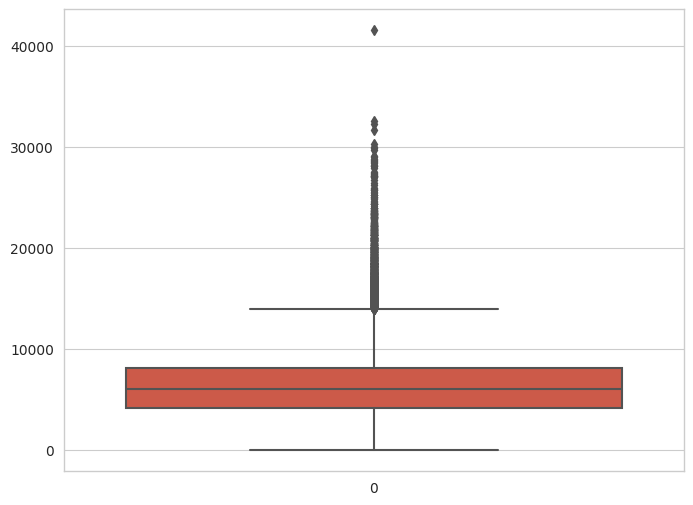

In [70]:
sns.boxplot(rossman_df['Sales'])


**Outlier is too much , we need to Deal with it**

**Let us First Remove Outliers of Sales Column**

In [71]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


**Now That The Outlier is Removed , Let us Define a New Variable**

In [72]:
df= remove_outlier(df, 'Sales')
